In [25]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from matplotlib import font_manager
from sklearn.preprocessing import LabelEncoder
import warnings
from IPython.display import display, HTML
print("Data Related Libraries Imported Successfully!!!")

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
print("Templates Imported Successfully!!!")

#Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.inspection import permutation_importance
import shap
print("Machine Learning Libraries Imported Successfully!!!")

Data Related Libraries Imported Successfully!!!
Templates Imported Successfully!!!
Machine Learning Libraries Imported Successfully!!!


In [26]:
#Data Dimension, Shape and Overview
data = pd.read_csv(r"D:\Projects\Python\virtual_environments\Datasets\BMW Sales Data (2010 - 2024).csv")
print("Dataset Overview: \n")
print("Data Frame Dimentions: ", data.ndim)
print(f"\nData Frame Have {data.shape[0]} Columns and {data.shape[1]} Rows")
print("\n" + "="*50 + "\n")
print(data.info())

Dataset Overview: 

Data Frame Dimentions:  2

Data Frame Have 50000 Columns and 11 Rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None


In [27]:
#Displaying first few rows
print("\nFirst five Rows: \n")
data.head()


First five Rows: 



,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [28]:
#Generating descriptive statistics
print("\nDescriptive Statistics: \n")
desc = data.describe().transpose()
desc.rename(columns=lambda x: str(x).capitalize(), inplace=True)
colored = desc.style.background_gradient(cmap="coolwarm", subset=["Mean","Std","Min","Max"])
colored


Descriptive Statistics: 



,Count,Mean,Std,Min,25%,50%,75%,Max
Year,50000.000000,2017.015700,4.324459,2010.000000,2013.000000,2017.000000,2021.000000,2024.000000
Engine_Size_L,50000.000000,3.247180,1.009078,1.500000,2.400000,3.200000,4.100000,5.000000
Mileage_KM,50000.000000,100307.203140,57941.509344,3.000000,50178.000000,100388.500000,150630.250000,199996.000000
Price_USD,50000.000000,75034.600900,25998.248882,30000.000000,52434.750000,75011.500000,97628.250000,119998.000000
Sales_Volume,50000.000000,5067.514680,2856.767125,100.000000,2588.000000,5087.000000,7537.250000,9999.000000


In [29]:
#check for missing values
print("\nMissing Values List: ")
missing_data = pd.DataFrame({"Missing Values" : data.isnull().sum().astype(float).round(2),
                             "Percentage" : (data.isnull().sum()/len(data)) * 100}).astype(float).round(2).sort_values("Percentage", ascending=False)
display(missing_data.style.background_gradient(cmap="coolwarm", subset=["Percentage"]))


Missing Values List: 


,Missing Values,Percentage
Model,0.000000,0.000000
Year,0.000000,0.000000
Region,0.000000,0.000000
Color,0.000000,0.000000
Fuel_Type,0.000000,0.000000
Transmission,0.000000,0.000000
Engine_Size_L,0.000000,0.000000
Mileage_KM,0.000000,0.000000
Price_USD,0.000000,0.000000
Sales_Volume,0.000000,0.000000


In [30]:
#Number of duplicate rows
print("\nNo. of Duplicate Rows: ", data.duplicated().sum())


No. of Duplicate Rows:  0


In [31]:
#Examine Unique Values in Each Category
print("Unique Values in Each Category: \n")
Category = ["Model" , "Region" , "Color" , "Fuel_Type" , "Transmission" , "Sales_Classification"]
for col in Category:
    unique_counts = data[col].nunique()
    print(f"{col}: {unique_counts} Unique Values")
    if unique_counts <= 15: #Limit The Values
        print(f"    {data[col].unique()}")
    print("-" * 80)

Unique Values in Each Category: 

Model: 11 Unique Values
    ['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3' 'X6']
--------------------------------------------------------------------------------
Region: 6 Unique Values
    ['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']
--------------------------------------------------------------------------------
Color: 6 Unique Values
    ['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']
--------------------------------------------------------------------------------
Fuel_Type: 4 Unique Values
    ['Petrol' 'Hybrid' 'Diesel' 'Electric']
--------------------------------------------------------------------------------
Transmission: 2 Unique Values
    ['Manual' 'Automatic']
--------------------------------------------------------------------------------
Sales_Classification: 2 Unique Values
    ['High' 'Low']
--------------------------------------------------------------------------------


In [32]:
#Check for Inconsistent Data
print("Data Consistency Checks: \n")
print(f"Year Range: {data['Year'].min()} to {data['Year'].max()}")
print(f"Price Range: ${data['Price_USD'].min():,.2f} to ${data['Price_USD'].max():,.2f}")
print(f"Mileage Range: {data['Mileage_KM'].min():,.0f} km to {data['Mileage_KM'].max():,.0f} km")

Data Consistency Checks: 

Year Range: 2010 to 2024
Price Range: $30,000.00 to $119,998.00
Mileage Range: 3 km to 199,996 km


<Figure size 1400x800 with 0 Axes>

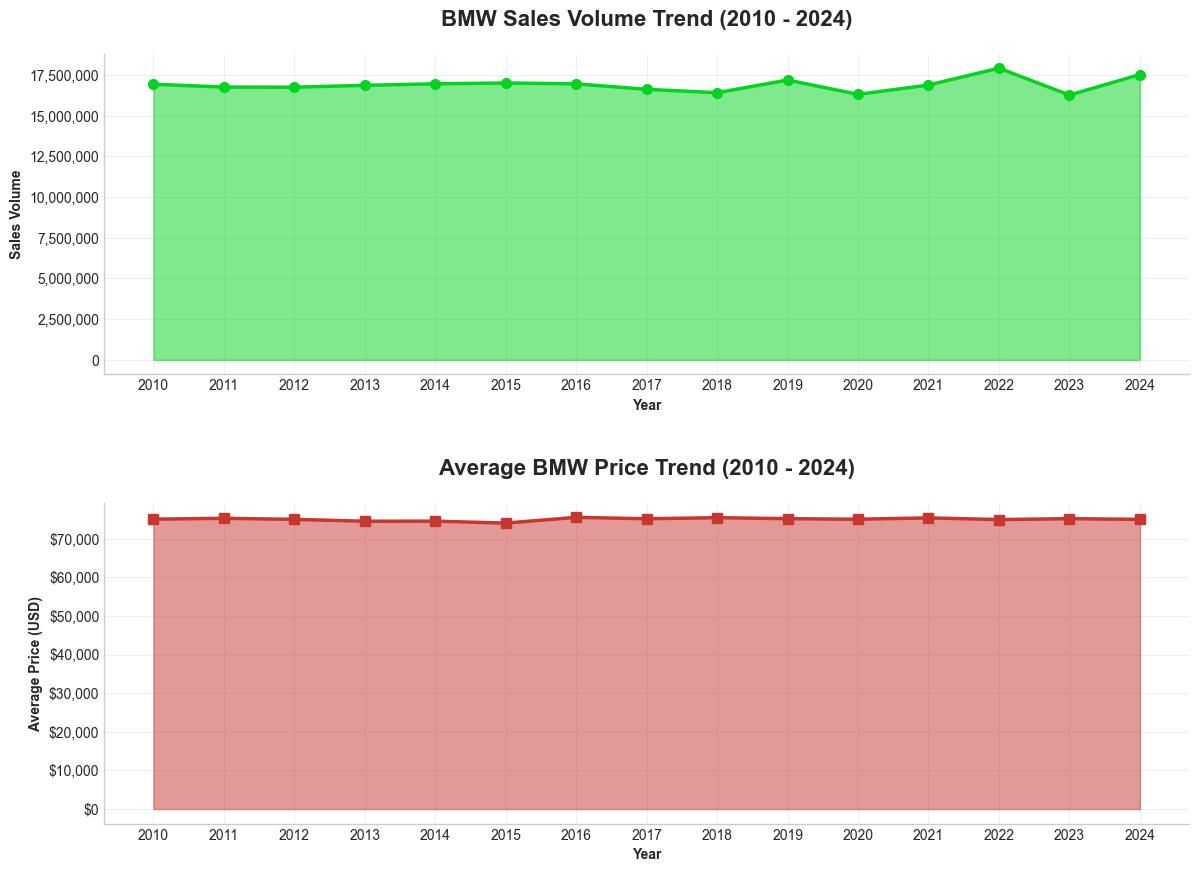


Total Sales Growth (2010-2024): 3.51%
Total Price Growth (2010-2024): -0.06%


In [33]:
#Growth Analysis
plt.figure(figsize=(14 , 8))
yearly_data = data.groupby("Year").agg({
    "Sales_Volume": "sum",
    "Price_USD": "mean"
}).reset_index()
fig, (ax1, ax2) = plt.subplots(2 , 1 , figsize=(14 , 10), gridspec_kw={"hspace":0.4})

#Sales Volume Trend
ax1.set_title("BMW Sales Volume Trend (2010 - 2024)", fontsize=16, fontweight="bold", pad=20)
ax1.set_xlabel("Year", fontweight="bold")
ax1.set_ylabel('Sales Volume', fontweight='bold')
ax1.spines[['top','right']].set_visible(False)
ax1.grid(True, alpha = 0.3)
ax1.plot(yearly_data["Year"], yearly_data["Sales_Volume"], marker = 'o', linewidth = 2.5, markersize = 7, color = '#02D41F')
ax1.fill_between(yearly_data['Year'], yearly_data['Sales_Volume'], alpha = 0.5, color = "#02D41F" )
ax1.set_xticks(yearly_data["Year"]);

#Price Trend
ax2.set_title("Average BMW Price Trend (2010 - 2024)", fontsize=16, fontweight="bold", pad=20)
ax2.set_xlabel("Year", fontweight="bold")
ax2.set_ylabel("Average Price (USD)", fontweight="bold")
ax2.spines[["top","right"]].set_visible(False)
ax2.grid(True, alpha = 0.3)
ax2.plot(yearly_data["Year"], yearly_data["Price_USD"], marker = "s", linewidth = 2.5, markersize = 7, color = "#C9362E")
ax2.fill_between(yearly_data["Year"], yearly_data["Price_USD"], alpha = 0.5 , color = "#C9362E")
ax2.set_xticks(yearly_data["Year"]);

#Formatting USD and Sales Volume in y axis
vlm = "{x:,.0f}"
fmt = "${x:,.0f}"
tick_format = ticker.StrMethodFormatter(vlm)
ax1.yaxis.set_major_formatter(tick_format)
tick_format = ticker.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick_format)
plt.show()

#Calculate Growth Rate
sales_growth = ((yearly_data["Sales_Volume"].iloc[-1] - yearly_data["Sales_Volume"].iloc[0]) / yearly_data["Sales_Volume"].iloc[0]) * 100
price_growth = ((yearly_data["Price_USD"].iloc[-1] - yearly_data["Price_USD"].iloc[0]) / yearly_data["Price_USD"].iloc[0]) * 100
print(f"\nTotal Sales Growth (2010-2024): {sales_growth:,.2f}%")
print(f"Total Price Growth (2010-2024): {price_growth:,.2f}%")

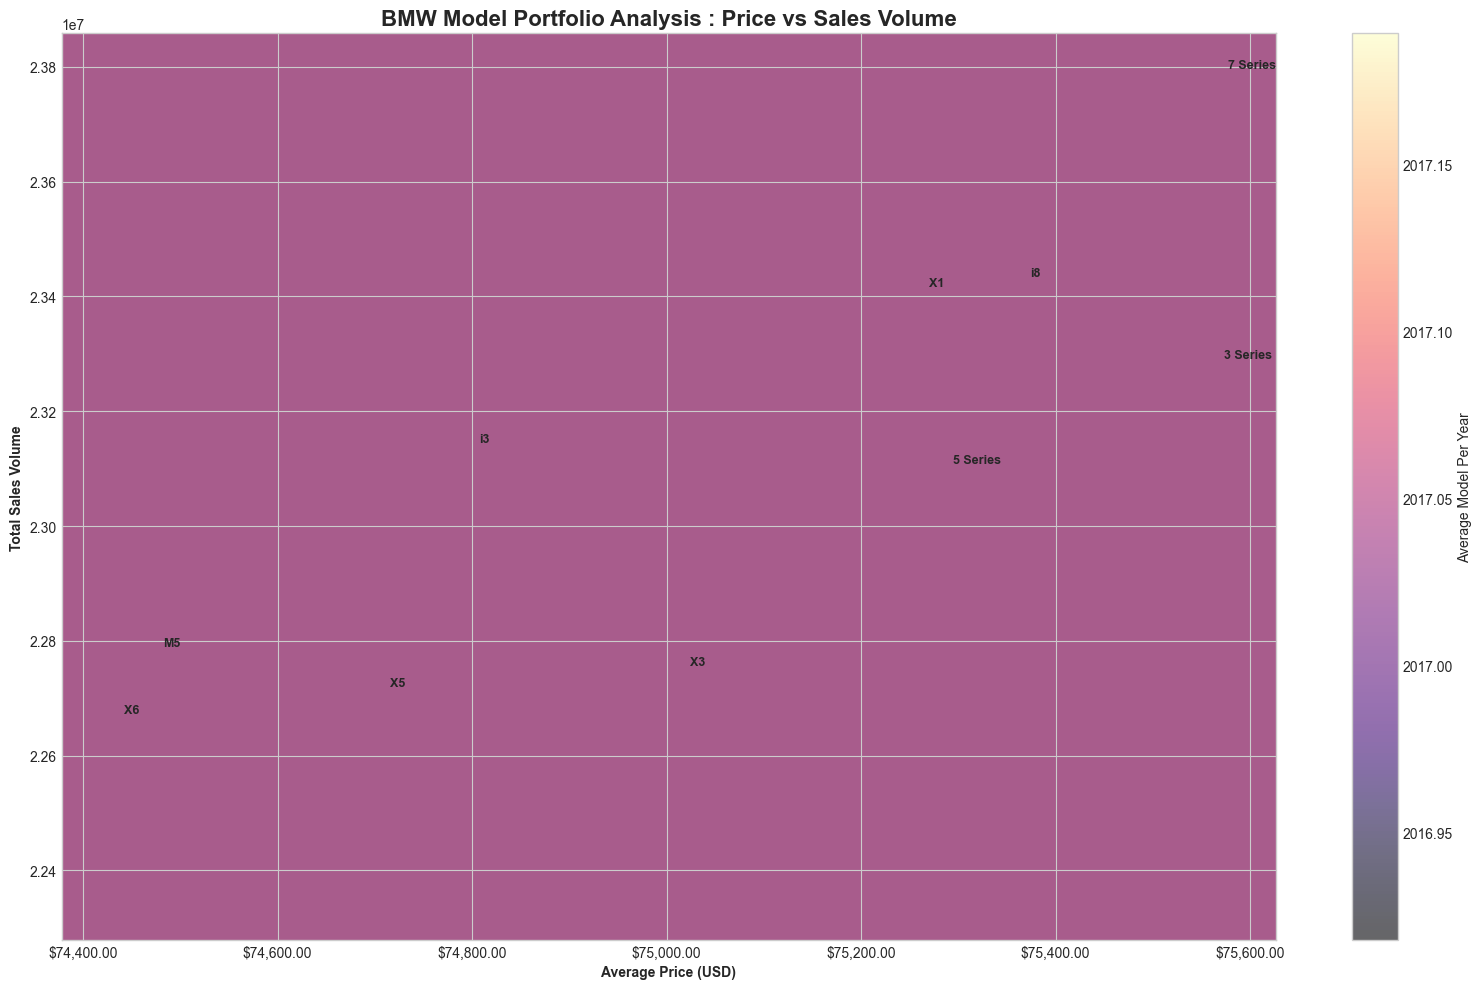

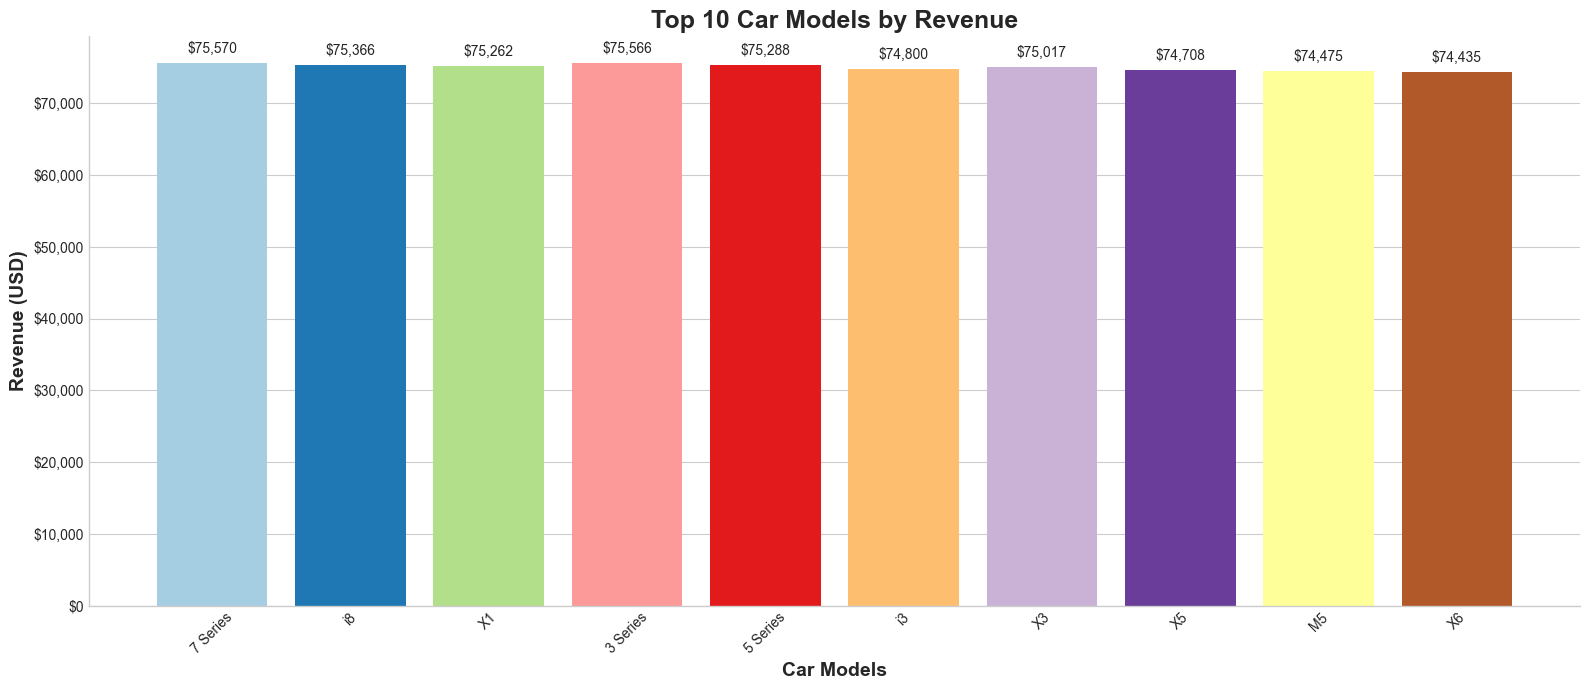


 Top 10 BMW Models by sales Volume: 



,Model,Sales_Volume,Price_USD,Revenue
1,7 Series,"23,786,466","$75,570","$1,797,547,915,426"
2,i8,"23,423,891","$75,366","$1,765,371,315,831"
3,X1,"23,406,060","$75,262","$1,761,592,014,518"
4,3 Series,"23,281,303","$75,566","$1,759,280,389,158"
5,i3,"23,133,849","$74,800","$1,730,418,106,955"
6,5 Series,"23,097,519","$75,288","$1,738,962,409,030"
7,M5,"22,779,688","$74,475","$1,696,515,691,910"
8,X3,"22,745,529","$75,017","$1,706,292,634,173"
9,X5,"22,709,749","$74,708","$1,696,602,580,378"
10,X6,"22,661,986","$74,435","$1,686,835,874,249"


In [34]:
#Analyze Model Performance
model_analysis = data.groupby("Model").agg({
    "Sales_Volume": "sum",
    "Price_USD": "mean",
    "Year": "mean"
}).sort_values("Sales_Volume", ascending = False).reset_index()
model_analysis["Revenue"] = model_analysis["Sales_Volume"] * model_analysis["Price_USD"]

#Creating Bubble Chart
plt.figure(figsize = (16 , 10))
scatter = plt.scatter(
    x = model_analysis["Price_USD"],
    y = model_analysis["Sales_Volume"],
    s = model_analysis["Revenue"]/100000,  #Scale bubble size
    alpha = 0.6,
    c = model_analysis["Year"],
    cmap = "magma",
    zorder = 0
)

#Adding Labels for Top Models
for i, row in model_analysis.nlargest(10, "Sales_Volume").iterrows():
    plt.annotate(row["Model"], (row["Price_USD"], row["Sales_Volume"]),
                  xytext = (5,5), textcoords="offset points", fontweight = "bold", fontsize = 9)
plt.colorbar(scatter, label = "Average Model Per Year")
plt.title("BMW Model Portfolio Analysis : Price vs Sales Volume", fontweight = "bold", fontsize = 16)
plt.xlabel("Average Price (USD)", fontweight = "bold")
plt.ylabel("Total Sales Volume", fontweight = "bold")
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}"))
plt.grid(True, alpha = 1, zorder = 1)
plt.tight_layout()
plt.show()

#Setting Top Models Sales Based on Following Table
top_models = model_analysis.nlargest(10, "Revenue")
colors = plt.cm.Paired(np.linspace(0 , 1 , len(top_models)))

# Create bar plot size
plt.figure(figsize=(16,7))

# Setting Bar Plot
ax = plt.gca() # Setting a variable. Direct plt usage with yaxis throw an error
bars = plt.bar(top_models["Model"], top_models['Price_USD'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f"${height:,.0f}", ha="center", va="bottom")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
plt.xlabel('Car Models', fontweight = "bold", fontsize = 14)
plt.ylabel('Revenue (USD)', fontweight = "bold", fontsize = 14)
plt.title('Top 10 Car Models by Revenue', fontweight = "bold", fontsize = 18)
plt.xticks(rotation=45, fontsize = 10)
plt.grid(False, axis = "x")
ax.spines[['top','right']].set_visible(False)
plt.tight_layout()
plt.show()

#Display Top 10 Models by Sales
print("\n Top 10 BMW Models by sales Volume: \n")
top_model = model_analysis.nlargest(10, "Sales_Volume")[["Model","Sales_Volume","Price_USD","Revenue"]]
top_model.index = range(1, len(top_model) + 1)
display(top_model.style.format(
    {
        "Sales_Volume": "{:,.0f}",
        "Price_USD": "${:,.0f}",
        "Revenue": "${:,.0f}"
    }
).background_gradient(cmap = "summer"))

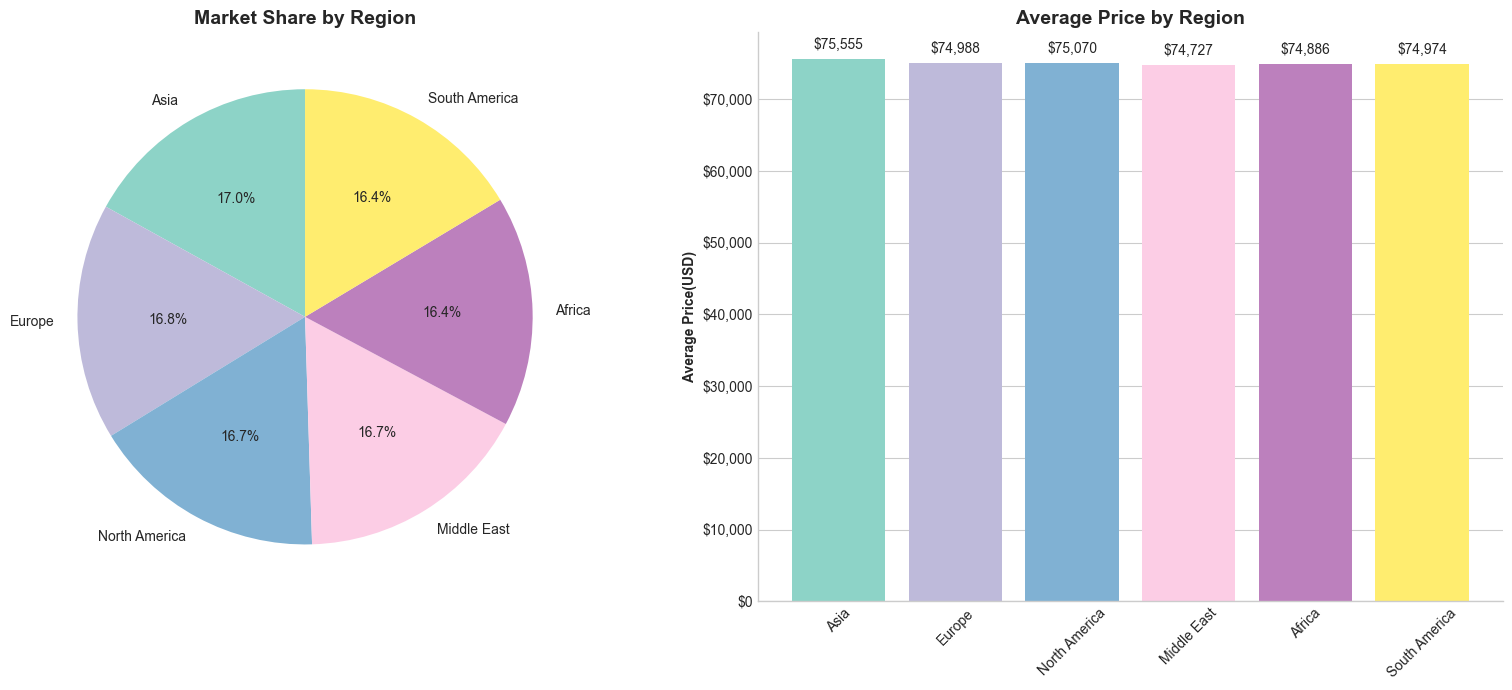


Regional Market Analysis:


,Region,Sales_Volume,Price_USD,Model,Market_Share
1,Asia,"42,974,277","$75,555",11,16.96%
2,Europe,"42,555,138","$74,988",11,16.80%
3,North America,"42,402,629","$75,070",11,16.74%
4,Middle East,"42,326,620","$74,727",11,16.71%
5,Africa,"41,565,252","$74,886",11,16.40%
6,South America,"41,551,818","$74,974",11,16.40%


In [35]:
#Analyze Reginoal Market Performance
regional_analysis = data.groupby("Region").agg({
    "Sales_Volume":"sum",
    "Price_USD":"mean",
    "Model":"nunique"
}).sort_values("Sales_Volume", ascending=False).reset_index()
regional_analysis["Market_Share"] = (regional_analysis["Sales_Volume"]/regional_analysis["Sales_Volume"].sum()) * 100

fig, (ax1 , ax2) = plt.subplots(1, 2, figsize=(16 , 7))

#Setting up pie chart
colors = plt.cm.Set3(np.linspace(0 , 1 , len(regional_analysis)))
wages, texts, autotexts = ax1.pie(regional_analysis["Market_Share"],
                                 labels = regional_analysis["Region"],
                                 autopct = "%1.1f%%",
                                 colors = colors,
                                 startangle = 90)
ax1.set_title("Market Share by Region", fontsize = 14, fontweight = "bold")

#Setting Second Chart
bars = ax2.bar(regional_analysis["Region"], regional_analysis["Price_USD"], color = colors)
ax2.set_title("Average Price by Region", fontsize = 14, fontweight= "bold")
ax2.set_ylabel("Average Price(USD)", fontweight = "bold")
ax2.tick_params(axis = "x", rotation=45)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax2.spines[['top','right']].set_visible(False)
ax2.grid(False, axis = "x")

#Add Value Labels on Bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f"${height:,.0f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()



#Display Regional Analysis Table
print("\nRegional Market Analysis:")
regional_analysis.index = range(1, len(regional_analysis) + 1)
display(regional_analysis.style.format({
    "Sales_Volume": "{:,.0f}",
    "Price_USD": "${:,.0f}",
    "Market_Share": "{:,.2f}%"
}).background_gradient(cmap = "icefire_r", subset=["Market_Share"]))

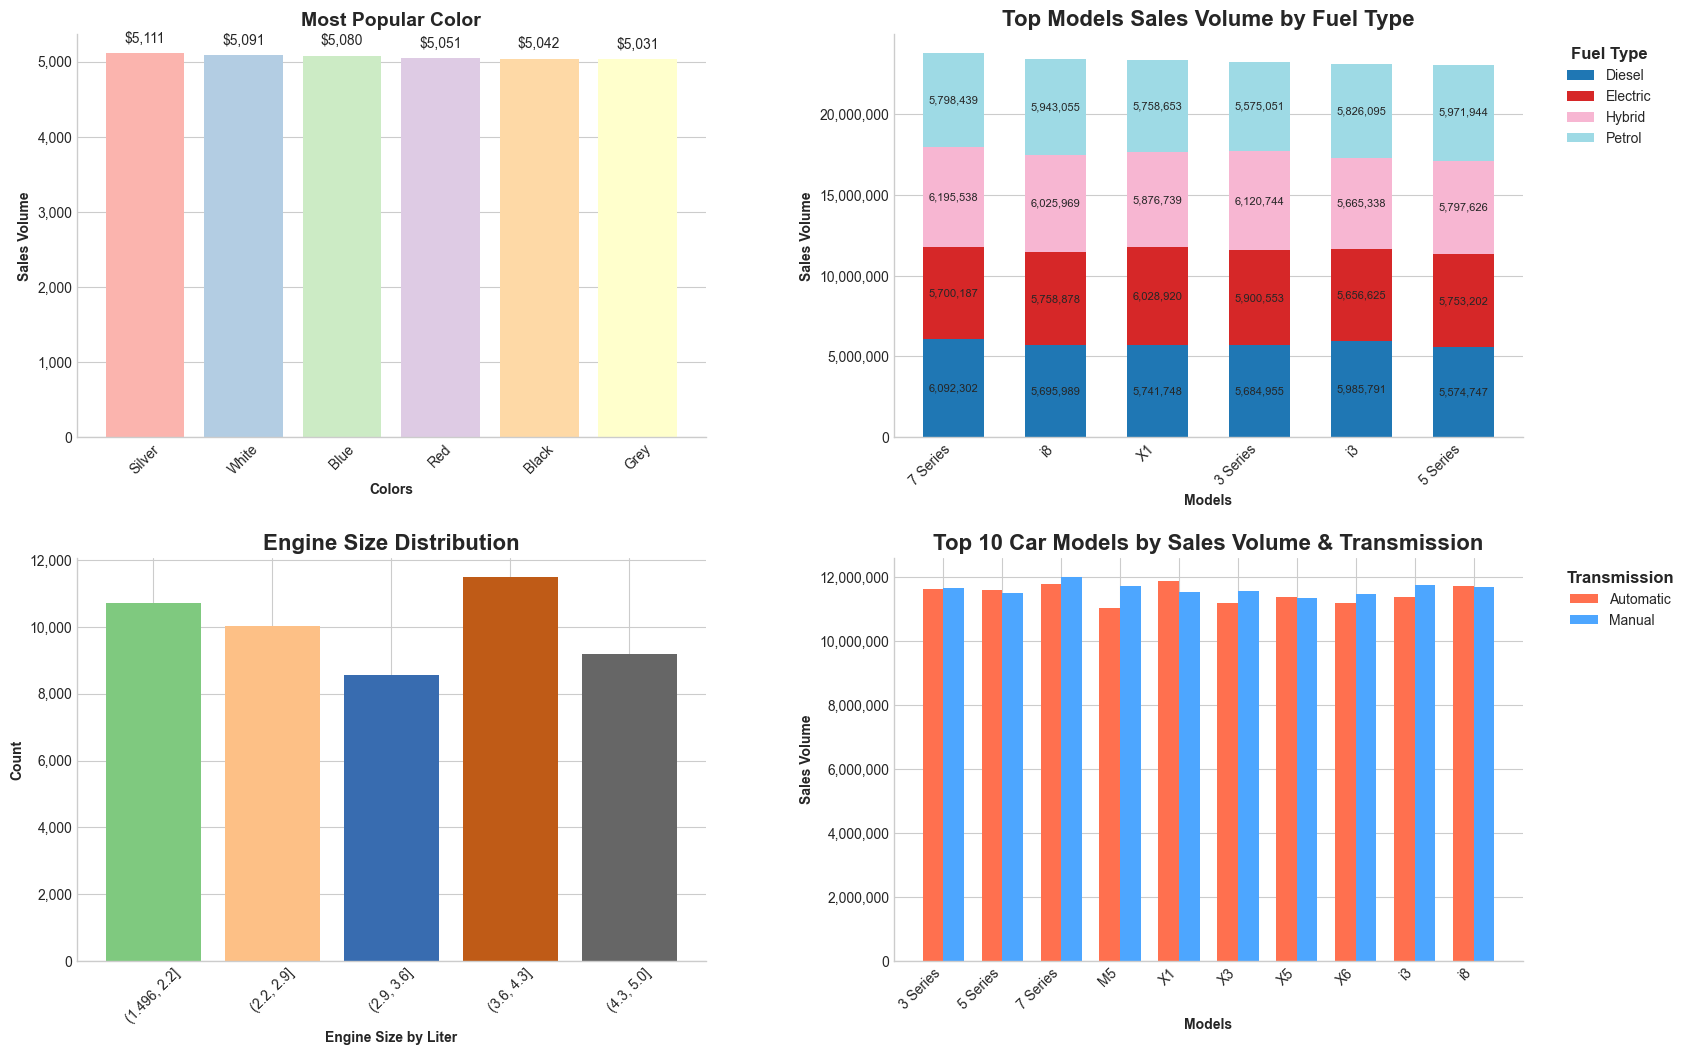


Customer Preference Insights: 

Most popular color: Red (8,463 units)
Most common fuel type: Hybrid (25.4%)
Transmission preference: Manual (50.3%)


In [36]:
# Analyze customer preferences
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
ax1, ax2, ax3, ax4 = axes
#Color Analyze
color_analyze = data.groupby("Color").agg(
    Sales_Volume=("Sales_Volume", "mean"),
    Price_USD=("Price_USD", "mean"),
    Count=("Color", "count")   #Groupby already have a working column named Color, so we changed the column name Count
).sort_values("Sales_Volume", ascending = False).reset_index()
cmap = plt.get_cmap("Pastel1")
colors = [cmap(i) for i in range(len(color_analyze))]
#Setting First Barplot (xaxis - Color, yaxis = Sales_Volume)
bars = ax1.bar(color_analyze["Color"], color_analyze["Sales_Volume"], color=colors)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 100,
            f"${height:,.0f}", ha="center", va="bottom")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax1.set_title("Most Popular Color", fontweight = 'bold', fontsize=14)
ax1.set_ylabel("Sales Volume", fontweight = 'bold', fontsize=10)
ax1.set_xlabel("Colors", fontweight = 'bold', fontsize=10)
ax1.spines[["top","right"]].set_visible(False)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(False, axis = "x")
#Setting Second Barplot (xaxis - Model, yaxis - Sales Volume)
agg_df = data.groupby(['Model', 'Fuel_Type'])['Sales_Volume'].sum().unstack(fill_value=0)
top_models = agg_df.sum(axis=1).nlargest(6).index  # top 6 models
agg_df = agg_df.loc[top_models].reset_index()
# X positions for bars
x = np.arange(len(agg_df))
# Fuel types (columns) and colors
fuel_types = agg_df.columns[1:]  # skip 'Model' column
colors2 = plt.get_cmap("tab20")(np.linspace(0, 1, len(fuel_types)))  # distinct colors
bottom = np.zeros(len(agg_df))  # cumulative bottom for stacking
for i, fuel in enumerate(fuel_types):
    ax2.bar(x, agg_df[fuel], bottom=bottom, width=0.6,  color=colors2[i], label=fuel)
    bottom += agg_df[fuel].values  # update bottom for stacking
# X-axis labels
ax2.set_xticks(x)
ax2.set_xticklabels(agg_df['Model'], rotation=45, ha='right')
bottom = np.zeros(len(agg_df))
for i, fuel in enumerate(fuel_types):
    for j in range(len(agg_df)):
        if agg_df[fuel].iloc[j] > 0:  # only if value exists
            ax2.text(
                x[j],
                bottom[j] + agg_df[fuel].iloc[j]/2,
                f"{agg_df[fuel].iloc[j]:,.0f}",
                ha='center', va='center', fontsize=8
            )
    bottom += agg_df[fuel].values
# Labels, title
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.set_ylabel("Sales Volume", fontweight = "bold", fontsize = 10)
ax2.set_xlabel("Models", fontweight = "bold", fontsize = 10)
ax2.set_title("Top Models Sales Volume by Fuel Type", fontweight = "bold", fontsize = 16)
ax2.spines[["top","right"]].set_visible(False)
ax2.grid(False, axis = "x")
plt.tight_layout()
plt.subplots_adjust(right=0.95, wspace=0.3, hspace=0.3)# leave space for legend
#ax2 Legend
ax2_legend = ax2.legend(
    title="Fuel Type",
    loc='best',
    bbox_to_anchor=(1.05, 1),
    title_fontproperties=font_manager.FontProperties(weight='bold', size=12)
)
#Setting Third Plot
engine_bins = pd.cut(data['Engine_Size_L'], bins=5)
engine_counts = engine_bins.value_counts().sort_index()
ax3.bar(
    [str(x) for x in engine_counts.index],
    engine_counts.values,
    color=plt.cm.Accent(np.linspace(0, 1, len(engine_counts)))
)
ax3.set_title('Engine Size Distribution', fontweight='bold', fontsize = 16)
ax3.tick_params(axis='x', rotation=45)
ax3.set_xlabel('Engine Size by Liter', fontweight = "bold", fontsize = 10)
ax3.set_ylabel('Count', fontweight = "bold", fontsize = 10)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax3.spines[["top","right"]].set_visible(False)



#Setting Forth Plot
top_models = data.groupby("Model")["Sales_Volume"].sum().nlargest(10).index
filtered_data = data[data["Model"].isin(top_models)]
#Aggregate by Model & Transmission
agg_data = filtered_data.groupby(["Model", "Transmission"])["Sales_Volume"].sum().unstack(fill_value=0)
#Bar positions
x = np.arange(len(agg_data))  # numeric positions for models
width = 0.35
trans_types = agg_data.columns  # dynamic transmission types
#Color Map
color_map = {
    "Automatic": "#FF704F",
    "Manual": "#4DA6FF"
}
#Plot grouped bars
for i, t in enumerate(trans_types):
    ax4.bar(x + i*width, agg_data[t], width=width, label=t, color=color_map.get(t, "#AAAAAA"))

#Fix x-axis and Y-axis & Details
n_bars = len(agg_data.columns)
ax4.set_title("Top 10 Car Models by Sales Volume & Transmission", fontweight = "bold", fontsize = 16)
ax4.set_xticks(x + width*(n_bars-1)/2)  # <-- center labels
ax4.set_xticklabels(agg_data.index, rotation=45, ha="right")
ax4.set_xlabel("Models", fontweight = "bold", fontsize = 10)
ax4.set_ylabel("Sales Volume", fontweight = "bold", fontsize = 10)
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax4.spines[["top","right"]].set_visible(False)
# Legend for ax4
ax4_legend = ax4.legend(
    title="Transmission",
    loc='best',
    bbox_to_anchor=(1.05, 1),  # lower so it doesn’t overlap ax2 legend
    title_fontproperties=font_manager.FontProperties(weight='bold', size=12)
)

plt.show()

# Calculate preference statistics
print("\nCustomer Preference Insights: \n")
color_counts = data['Color'].value_counts().head(10)
fuel_counts = data['Fuel_Type'].value_counts().head(10)
transmission_counts = data['Transmission'].value_counts().head(10)
print(f"Most popular color: {color_counts.index[0]} ({color_counts.iloc[0]:,} units)")
print(f"Most common fuel type: {fuel_counts.index[0]} ({fuel_counts.iloc[0]/len(data)*100:.1f}%)")
print(f"Transmission preference: {transmission_counts.index[0]} ({transmission_counts.iloc[0]/len(data)*100:.1f}%)")

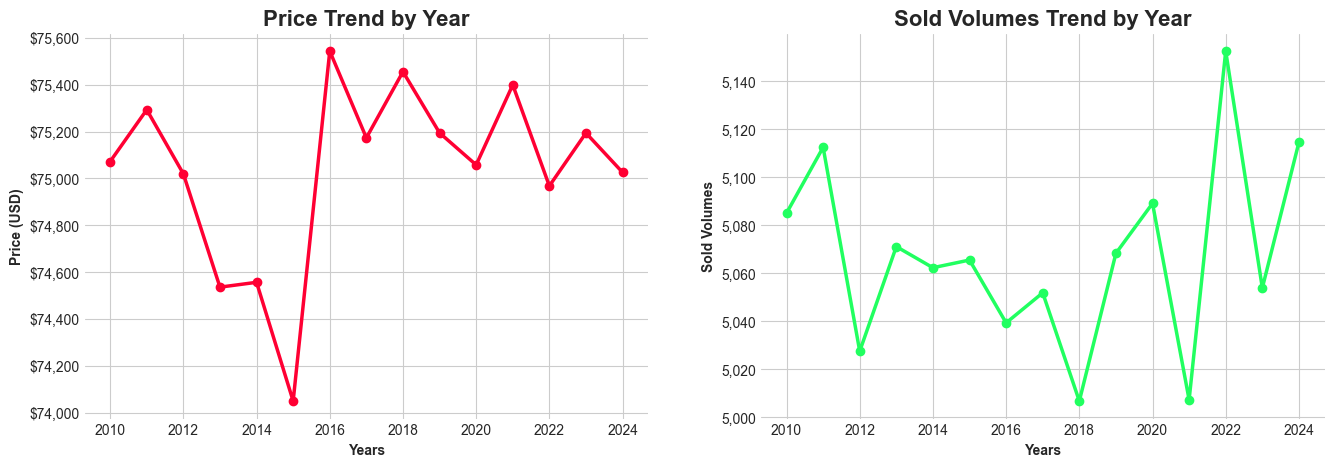


Summary: 
Price has decreased -0.0618% while sales volume has increased 0.5771% from 2010 to 2024.


In [37]:
#Seting size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
#Setting first plot
year_price = data.groupby('Year')['Price_USD'].mean()
ax1.plot(year_price.index, year_price.values, marker='o', linewidth=2.5, color = "#FF0033")
ax1.set_xlabel("Years", fontweight = "bold", fontsize = 10)
ax1.set_ylabel("Price (USD)", fontweight = "bold", fontsize = 10)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax1.set_title("Price Trend by Year", fontweight = "bold", fontsize = 16)
ax1.spines[["top","right","bottom","left"]].set_visible(False)
#Setting Second Plot
year_volume = data.groupby("Year")["Sales_Volume"].mean()
ax2.plot(year_volume.index, year_volume.values, marker='o', linewidth=2.5, color = "#21FF60")
ax2.set_xlabel("Years", fontweight = "bold", fontsize = 10)
ax2.set_ylabel("Sold Volumes", fontweight = "bold", fontsize = 10)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax2.set_title("Sold Volumes Trend by Year", fontweight = "bold", fontsize = 16)
ax2.spines[["top","right","bottom","left"]].set_visible(False)
plt.show()

print("\nSummary: ")
print("="*70)
price_growth = ((year_price.iloc[-1] - year_price.iloc[0]) / year_price.iloc[-1]) * 100
sales_growth = ((year_volume.iloc[-1] - year_volume.iloc[0]) / year_volume.iloc[-1]) * 100
print(f"Price has decreased {price_growth:,.4f}% while sales volume has increased {sales_growth:,.4f}% from 2010 to 2024.")

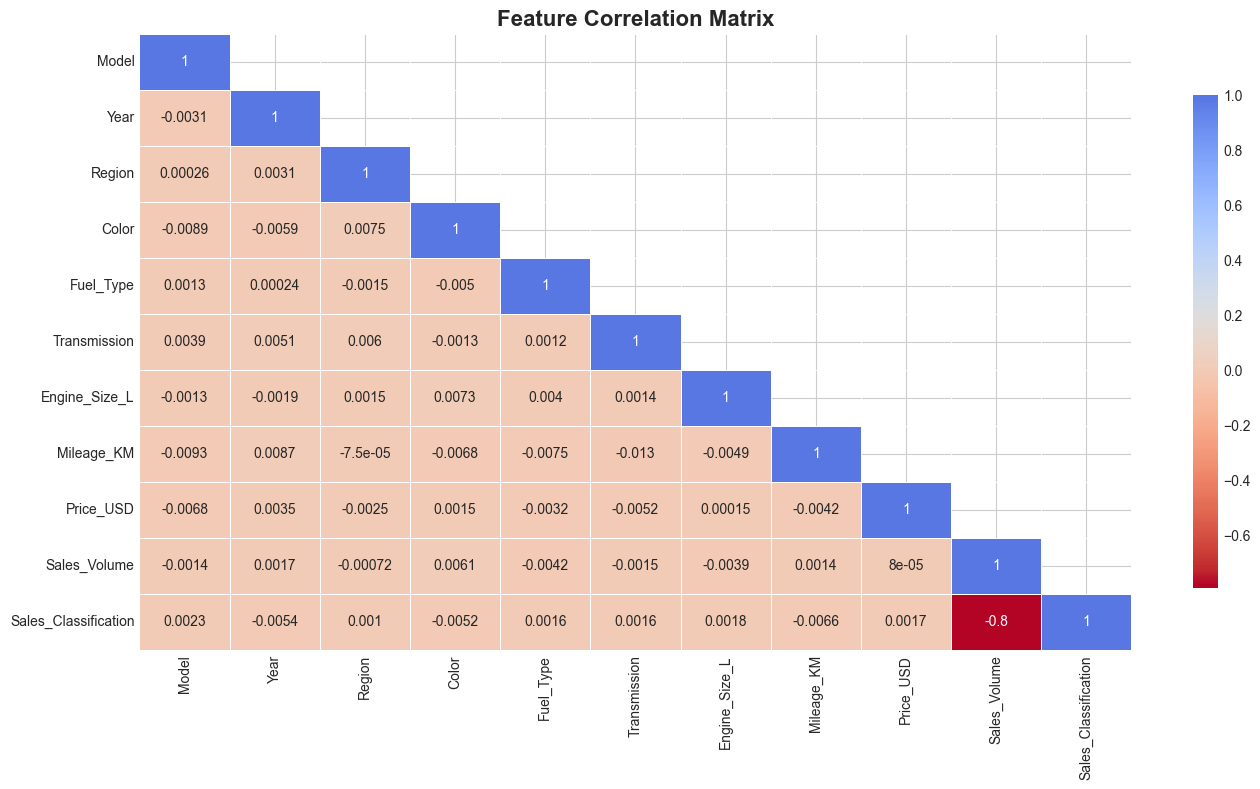


Features Correlated with Price: 


,Price_USD
Price_USD,1.000000
Year,0.003547
Sales_Classification,0.001727
Color,0.001548
Engine_Size_L,0.000146
Sales_Volume,0.000080
Region,-0.002456
Fuel_Type,-0.003228
Mileage_KM,-0.004238
Transmission,-0.005230


In [38]:
#Corelation Analysis
corr_data = data.copy()
label_encoder = {}
#Corelation Matrixs cannot handle string, so we have to encode them to get a unique numeric value for each string
for column in ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']:
    label = LabelEncoder()
    corr_data[column] = label.fit_transform(corr_data[column])
    label_encoder[column] =  label
corr_matrix = corr_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', center=0.2, linewidths=0.5, cbar_kws={"shrink": .8}, mask=mask)
warnings.filterwarnings("ignore", category=RuntimeWarning)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()
print("\nFeatures Correlated with Price: ")
price_correlations = corr_matrix['Price_USD'].sort_values(ascending=False)
display(pd.DataFrame(price_correlations).style.background_gradient(cmap='coolwarm'))

In [39]:
ml_data = data.copy()
#Encoding categorical variables
for column in ["Model" , "Region" , "Color" , "Fuel_Type" , "Transmission" , "Sales_Classification"]:
    label = LabelEncoder()
    ml_data[column] = label.fit_transform(ml_data[column])
#Define Features & Targets
X = ml_data.drop("Price_USD", axis = 1)
Y = ml_data["Price_USD"]
#Split the Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)
print("\nData Split Completed: ")
print(f"Training Set: {X_train.shape[0]} Samples")
print(f"Testing Set: {X_test.shape[0]} Samples")


Data Split Completed: 
Training Set: 40000 Samples
Testing Set: 10000 Samples


In [40]:
#Initialize Models
models = {
    "Random Forest" : RandomForestRegressor(random_state=42),
    "Gradient Boost" : GradientBoostingRegressor(random_state=42)
}

#Hyperparameters
parameter_grids = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2 , 5]  
    },
    "Gradient Boost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3 , 5]  
    }
}
results = {}
for name, model in models.items():
    print(f"Training Using {name}.....")
    grid_search = GridSearchCV(model, parameter_grids[name], cv = 3, scoring = "r2", n_jobs = -1, verbose = 0)
    grid_search.fit(X_train, Y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)
    results[name] = {
        "model": best_model,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "params": grid_search.best_params_,
    }
    print(f"{name} trained with R²: {r2:.4f}")

Training Using Random Forest.....
Random Forest trained with R²: -0.0005
Training Using Gradient Boost.....
Gradient Boost trained with R²: -0.0001


In [41]:
results_data = pd.DataFrame({
    "Model": results.keys(),
    "R2 Score": [results[x]["r2"] for x in results],
    "MAE": [results[x]["mae"] for x in results],
    "RMSE": [results[x]["rmse"] for x in results]
})
display(HTML("<br>Model Performance Comparison Table: "))
display(
    results_data.style.background_gradient(cmap='coolwarm', subset=['R2 Score' , 'MAE' , 'RMSE'])
    .hide(axis="index")
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]}
        ])
)

Model,R2 Score,MAE,RMSE
Random Forest,-0.000532,22568.272282,26024.525647
Gradient Boost,-0.000107,22558.998968,26019.006310



Best Model: Gradient Boost



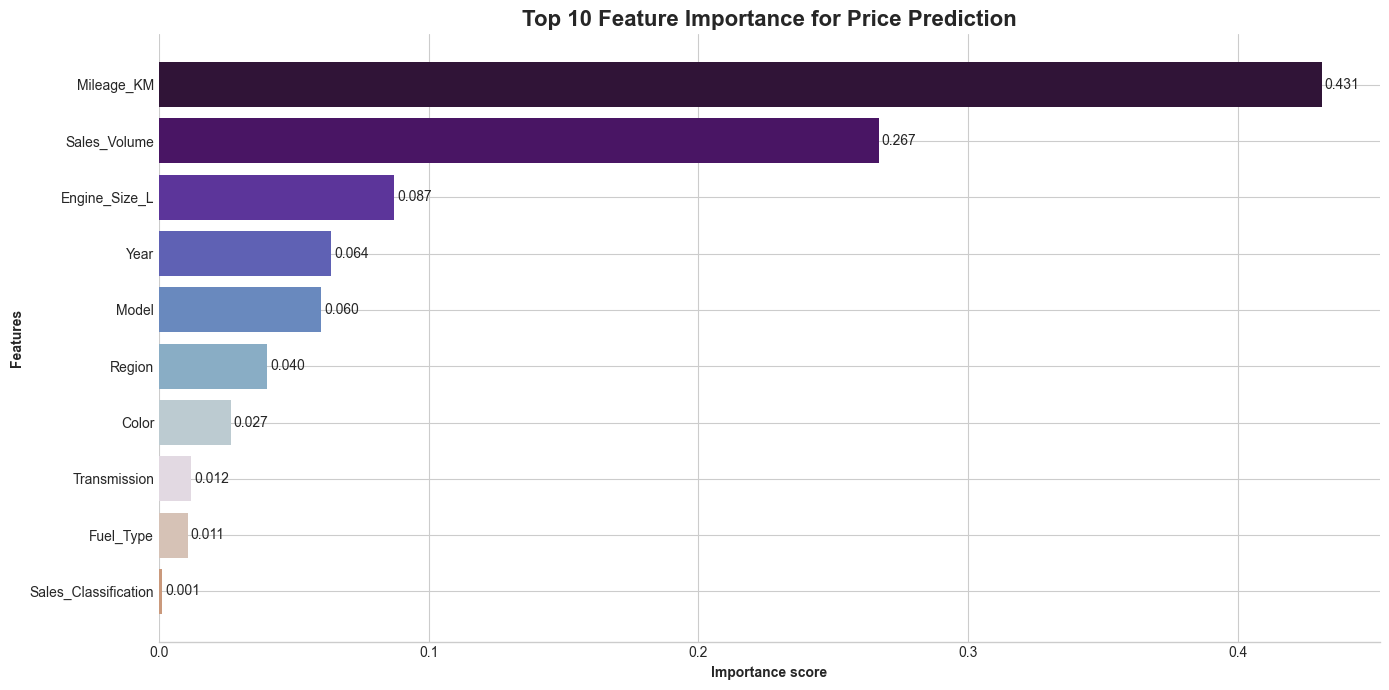

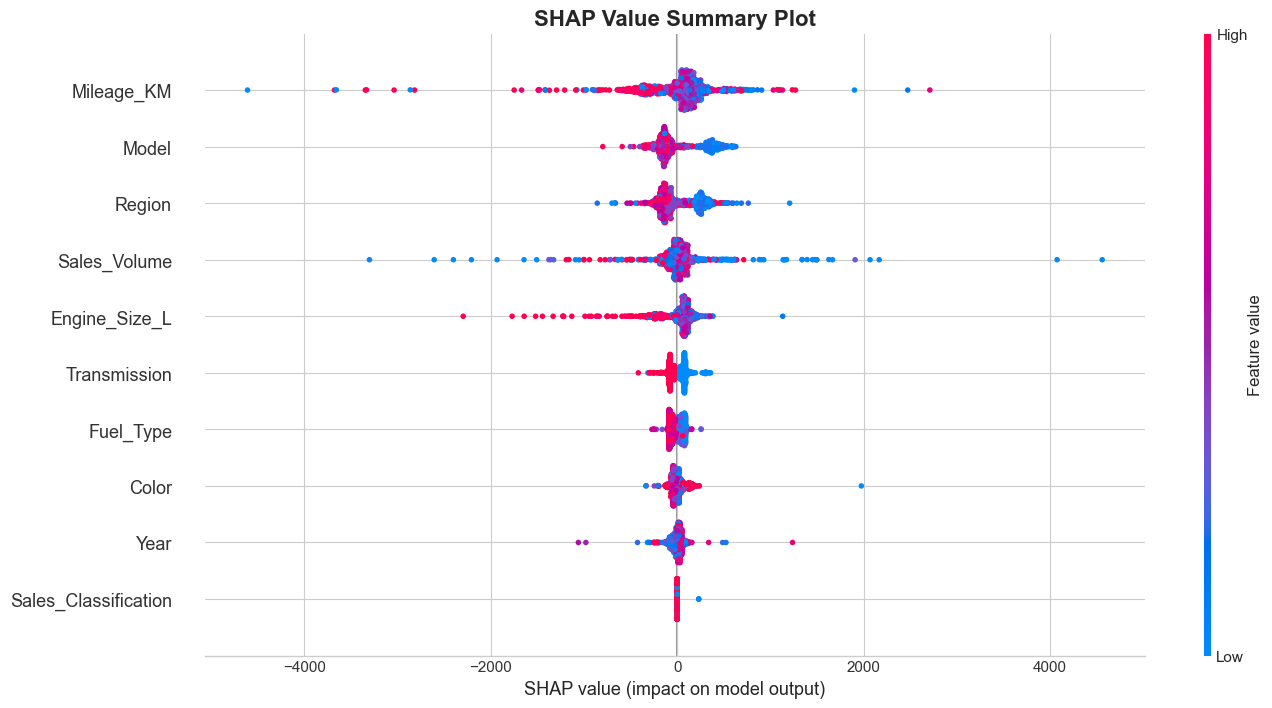

In [42]:
#Get The Best Model
best_model_name = max(results, key = lambda x: results[x]['r2'])
best_model = results[best_model_name]["model"]
print(f"\nBest Model: {best_model_name}\n")
feature_importance = pd.DataFrame({
    "feature":X.columns,
    "importance":best_model.feature_importances_
}).sort_values("importance", ascending=False)
fig, ax = plt.subplots(figsize=(14,7), tight_layout=True)
#Setting Plot 1
bars = ax.barh(feature_importance["feature"][:10],
                feature_importance["importance"][:10],
                color=plt.cm.twilight_shifted(np.linspace(0, 1, 15)
               ))
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}', ha='left', va='center')
ax.invert_yaxis()
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Top 10 Feature Importance for Price Prediction', fontsize=16, fontweight='bold')
ax.set_xlabel("Importance score", fontweight = "bold", fontsize = 10)
ax.set_ylabel("Features", fontweight = "bold", fontsize = 10)
ax.spines[["top","right","left"]].set_visible(False)
plt.show()

text = "SHAP Summary Plot: "
display(HTML(f"<div style='text-align:center'><br>{text}<br></div>"))
X_sample = X_train.sample(1000, random_state=42)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values, X_sample, plot_size=(14, 7), show=False)
plt.title('SHAP Value Summary Plot', fontsize=16, fontweight='bold')
plt.gcf().suptitle('')  # Remove the auto title
plt.show()

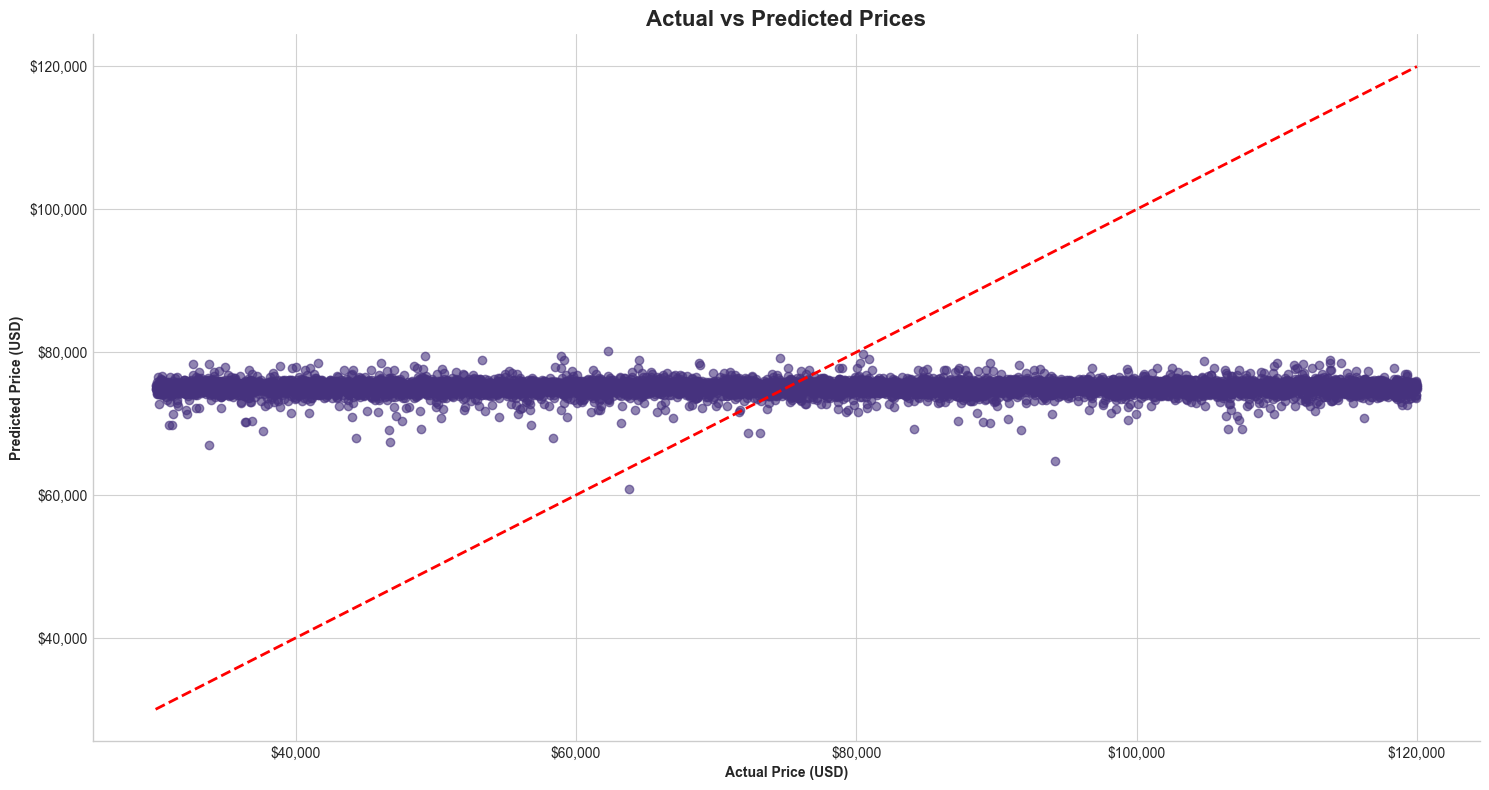

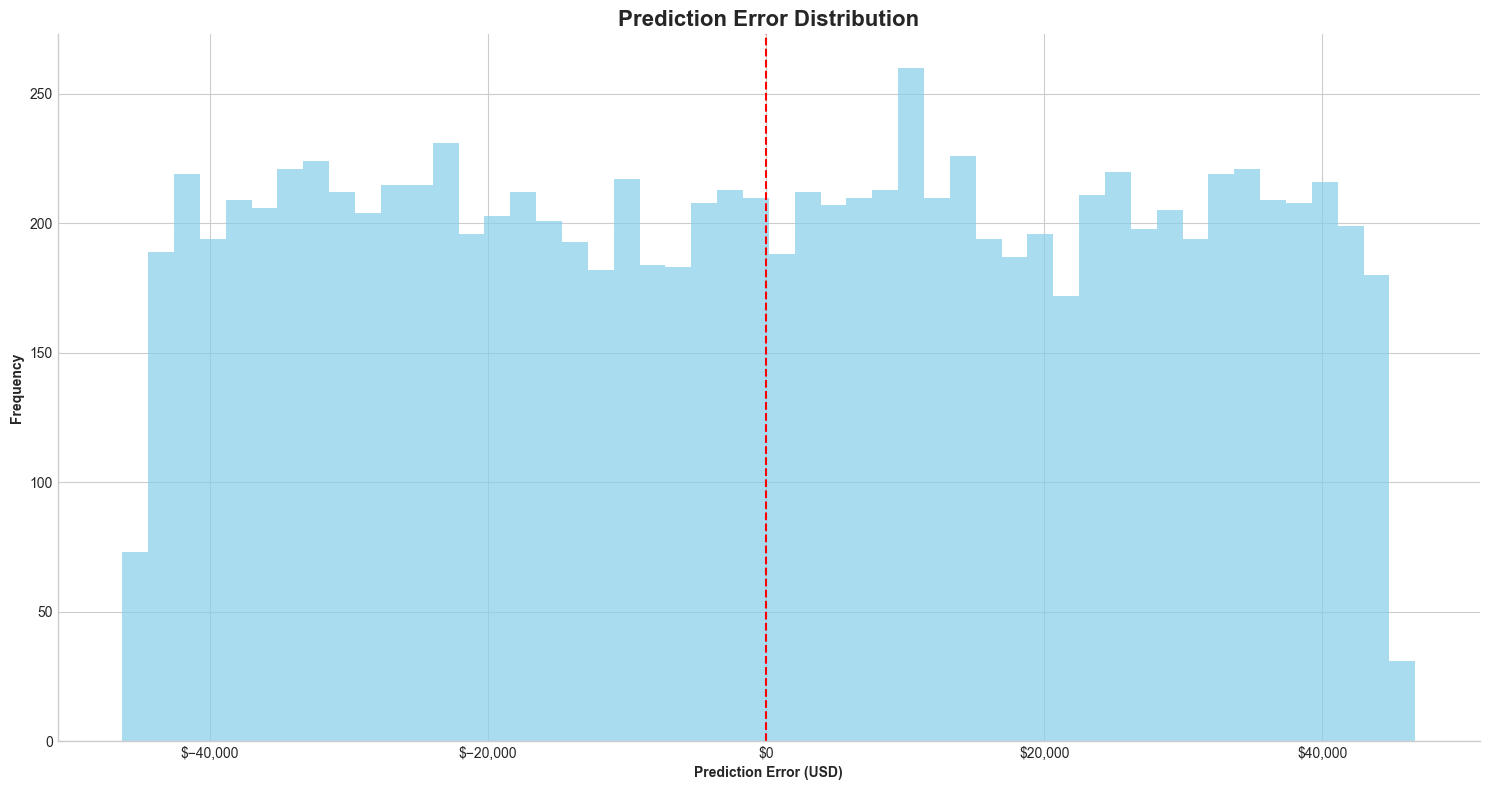


Prediction Error Statistics:

Mean Absolute Error: $22,559.00
Root Mean Squared Error: $26,019.01
R² Score: -0.0001
Mean Absolute Percentage Error: 37.35%


In [43]:
y_pred = best_model.predict(X_test)
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': Y_test.values,
    'Predicted': y_pred,
    'Error': Y_test.values - y_pred
})
# Plot actual vs predicted
plt.figure(figsize=(15, 8))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices', fontsize=16, fontweight='bold')
plt.xlabel('Actual Price (USD)', fontweight='bold', fontsize = 10)
plt.ylabel('Predicted Price (USD)', fontweight='bold', fontsize = 10)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.grid(True, alpha=0.9)
plt.gca().spines[["top","right"]].set_visible(False)
plt.tight_layout()
plt.show()

# Error distribution
plt.figure(figsize=(15, 8))
plt.hist(comparison_df['Error'], bins=50, alpha=0.7, color='skyblue')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Prediction Error Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Prediction Error (USD)', fontweight='bold', fontsize = 10)
plt.ylabel('Frequency', fontweight='bold', fontsize = 10)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.grid(True, alpha=1)
plt.gca().spines[["top","right"]].set_visible(False)
plt.tight_layout()
plt.show()

# Calculate error statistics
error_stats = {
    'Mean Absolute Error': f"${results[best_model_name]['mae']:,.2f}",
    'Root Mean Squared Error': f"${results[best_model_name]['rmse']:,.2f}",
    'R² Score': f"{results[best_model_name]['r2']:.4f}",
    'Mean Absolute Percentage Error': f"{(np.mean(np.abs(comparison_df['Error'] / comparison_df['Actual'])) * 100):.2f}%"
}

print("\nPrediction Error Statistics:\n")
for stat, value in error_stats.items():
    print(f"{stat}: {value}")

In [44]:
# Create executive summary of key insights
insights = {
    "Sales Growth": f"{sales_growth:.1f}% growth from 2010 to 2024",
    "Price Increase": f"Average prices increased by {price_growth:.1f}% over 14 years",
    "Top Model": f"{model_analysis.iloc[0]['Model']} is the best-selling model",
    "Most Profitable Region": f"{regional_analysis.iloc[0]['Region']} has the highest market share",
    "Customer Preference": f"{color_counts.index[0]} is the most popular color",
    "Price Prediction Accuracy": f"ML model achieves {results[best_model_name]['r2']:.4f} R² score"
}

print("\nKEY INSIGHTS SUMMARY:")
print("=" * 70)
for i, (key, value) in enumerate(insights.items(), 1):
    print(f"{i}. {key}: {value}")


KEY INSIGHTS SUMMARY:
1. Sales Growth: 0.6% growth from 2010 to 2024
2. Price Increase: Average prices increased by -0.1% over 14 years
3. Top Model: 7 Series is the best-selling model
4. Most Profitable Region: Asia has the highest market share
5. Customer Preference: Red is the most popular color
6. Price Prediction Accuracy: ML model achieves -0.0001 R² score
